In [1]:
import numpy as np

from time import time

import matplotlib.pyplot as plt

In [2]:
import rustworkx as rx

from qiskit_nature.problems.second_quantization.lattice import Lattice

# Custom Heisenberg couplings
import sys
sys.path.append(r'.')  # may be needed if running notebook on a cloud service
from heisenberg_model import HeisenbergModel

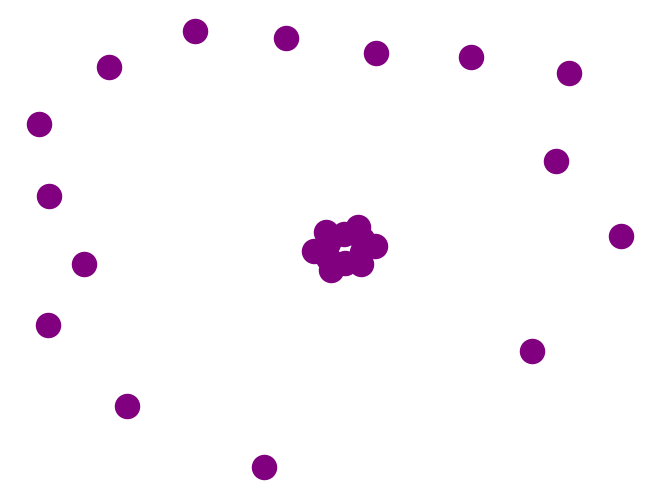

In [3]:
num_sites = 27
# Edge weight
t = 1.0

# Generate graph of kagome unit cell
# Start by defining all the edges
graph = rx.PyGraph(multigraph=False)
graph.add_nodes_from(range(num_sites))
edge_list = [
    (1, 2, t),
    (2, 4, t),
    (4, 5, t),
    (5, 11, t),
    (11, 13, t),
    (13, 26, t),
    (26, 17, t),
    (17, 16, t),
    (16, 12, t),
    (12, 8, t),
    (8, 7, t),
    (7, 1, t),
    (2, 5, t),
    (5, 13, t),
    (13, 17, t),
    (17, 12, t),
    (12, 7, t),
    (7, 2, t),
]
# Generate graph from the list of edges
graph.add_edges_from(edge_list)

# Make a Lattice from graph
kagome_unit_cell = Lattice(graph)

# Draw Lattice
kagome_unit_cell.draw(style={'node_color':'purple','width':5.0})
# plt.savefig('kagome_unit_cell.png')
plt.show()

In [4]:
from qiskit_nature.mappers.second_quantization import LogarithmicMapper

In [6]:
# Build Hamiltonian from graph edges
heis = HeisenbergModel.uniform_parameters(
    lattice=kagome_unit_cell,
    uniform_interaction=1.0,  # same spin-spin interaction weight as used in graph
    uniform_onsite_potential=0.0,  # No singe site external field
)

# The Lattice needs an explicit mapping to the qubit states.
# We map 1 qubit for 1 spin-1/2 particle using the LogarithmicMapper
log_mapper = LogarithmicMapper()
# Multiply by factor of 4 to account for (1/2)^2 terms from spin operators in the HeisenbergModel
ham = 4 * log_mapper.map(heis.second_q_ops().simplify())
gs_energy=-18.0

ham

PauliSumOp(SparsePauliOp(['ZIIIIIIIIZIIIIIIIIIIIIIIIII', 'IIIIIIIIIZZIIIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIZIIIIIIIIIIIII', 'IIIIIIIIIZIIIZIIIIIIIIIIIII', 'IIIIIIIIIZIIIIZIIIIIIIIIIII', 'IIIIIIIIIIZIIIZIIIIIIIIIIII', 'IIIIIIIIIIIIIZIZIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIIZIIIIIIII', 'IIIIIIIIIIIIIIZIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIZZIIIIIII', 'IIIIIIIIIIIIIZIIIIIIIZIIIII', 'IIIIIIIIIIIIIIIZIIIIIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIZZIIII', 'IIIIIIIIIIIIIIIIIIIZIIIIZII', 'IIIIIIIIIIIIIIIIIIIIIZIIZII', 'IIIIIIIIIIIIIIIIIIIIIIZIZII', 'IIIIIIIIIIIIIIIIIIIZIIIIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIZZI', 'YIIIIIIIIYIIIIIIIIIIIIIIIII', 'IIIIIIIIIYYIIIIIIIIIIIIIIII', 'YIIIIIIIIIIIIYIIIIIIIIIIIII', 'IIIIIIIIIYIIIYIIIIIIIIIIIII', 'IIIIIIIIIYIIIIYIIIIIIIIIIII', 'IIIIIIIIIIYIIIYIIIIIIIIIIII', 'IIIIIIIIIIIIIYIYIIIIIIIIIII', 'IIIIIIIIIIIIIIYIIIYIIIIIIII', 'IIIIIIIIIIIIIIYIIIIYIIIIIII', 'IIIIIIIIIIIIIIIIIIYYIIIIIII', 'IIIIIIIIIIIIIYIIIIIIIYIIIII', 'IIIIIIIIIIIIIIIYIIIIIYIIIII', 'IIIIIIIIIIIIIIIIIIIIIYYIIII', 'IIIIIIIIIIII

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_ibm_provider import IBMProvider
from qiskit import IBMQ
provider = IBMProvider(instance='ibm-q/open/main')

In [8]:
from qiskit.circuit.library import EfficientSU2
from qiskit import Aer, transpile

In [9]:
ansatz =EfficientSU2(12, entanglement='linear', reps=3, skip_final_rotation_layer=True).decompose()
ansatz.draw(fold=300) #fold=300

┌──────────┐┌───────────┐     ┌───────────┐┌───────────┐                          ┌───────────┐┌───────────┐                                                                                                                                            
 q_0: ─┤ Ry(θ[0]) ├┤ Rz(θ[12]) ├──■──┤ Ry(θ[24]) ├┤ Rz(θ[36]) ├───────────────────■──────┤ Ry(θ[48]) ├┤ Rz(θ[60]) ├───────────────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       ├──────────┤├───────────┤┌─┴─┐└───────────┘├───────────┤┌───────────┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐                                                                                                                      
 q_1: ─┤ Ry(θ[1]) ├┤ Rz(θ[13]) ├┤ X ├──────■──────┤ Ry(θ[25]) ├┤ Rz(θ[37]) ├────┤ X ├──────────■──────┤ Ry(θ[49]) ├┤ Rz(θ[61]) ├────┤ X ├──────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────
       ├──────────┤├───────────┤└───┘    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐                                                                                                         
 q_2: ─┤ Ry(θ[2]) ├┤ Rz(θ[14]) ├─────────┤ X ├──────────■──────┤ Ry(θ[26]) ├┤ Rz(θ[38]) ├────┤ X ├──────────■──────┤ Ry(θ[50]) ├┤ Rz(θ[62]) ├────┤ X ├──────────■──────────────────────────────────────────────────────────────────────────────────────────────
       ├──────────┤├───────────┤         └───┘        ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐                                                                                            
 q_3: ─┤ Ry(θ[3]) ├┤ Rz(θ[15]) ├──────────────────────┤ X ├──────────■──────┤ Ry(θ[27]) ├┤ Rz(θ[39]) ├────┤ X ├──────────■──────┤ Ry(θ[51]) ├┤ Rz(θ[63]) ├────┤ X ├──────────■─────────────────────────────────────────────────────────────────────────────────
       ├──────────┤├───────────┤                      └───┘        ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐                                                                               
 q_4: ─┤ Ry(θ[4]) ├┤ Rz(θ[16]) ├───────────────────────────────────┤ X ├──────────■──────┤ Ry(θ[28]) ├┤ Rz(θ[40]) ├────┤ X ├──────────■──────┤ Ry(θ[52]) ├┤ Rz(θ[64]) ├────┤ X ├──────────■────────────────────────────────────────────────────────────────────
       ├──────────┤├───────────┤                                   └───┘        ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐                                                                  
 q_5: ─┤ Ry(θ[5]) ├┤ Rz(θ[17]) ├────────────────────────────────────────────────┤ X ├──────────■──────┤ Ry(θ[29]) ├┤ Rz(θ[41]) ├────┤ X ├──────────■──────┤ Ry(θ[53]) ├┤ Rz(θ[65]) ├────┤ X ├──────────■───────────────────────────────────────────────────────
       ├──────────┤├───────────┤                                                └───┘        ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐                                                     
 q_6: ─┤ Ry(θ[6]) ├┤ Rz(θ[18]) ├─────────────────────────────────────────────────────────────┤ X ├──────────■──────┤ Ry(θ[30]) ├┤ Rz(θ[42]) ├────┤ X ├──────────■──────┤ Ry(θ[54]) ├┤ Rz(θ[66]) ├────┤ X ├──────────■──────────────────────────────────────────
       ├──────────┤├───────────┤                                                             └───┘        ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐                                        
 q_7: ─┤ Ry(θ[7]) ├┤ Rz(θ[19]) ├──────────────────────────────────────────────────────────────────────────┤ X ├──────────■──────┤ Ry(θ[31]) ├┤ Rz(θ[43]) ├────┤ X ├────

In [10]:
q_layout = [1, 2, 4, 5, 13, 11, 26, 17, 16, 12, 8, 7]
ansatz_opt = transpile(ansatz, backend=Aer.get_backend('qasm_simulator'), initial_layout=q_layout)

print('number and type of gates in the cirucit:', ansatz_opt.count_ops())
print('number of parameters in the circuit:', ansatz_opt.num_parameters)
ansatz_opt.draw(fold=300)

number and type of gates in the cirucit: OrderedDict([('ry', 36), ('rz', 36), ('cx', 33)])
number of parameters in the circuit: 72


»
  ancilla_0 -> 0 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  ┌──────────┐┌───────────┐     ┌───────────┐┌───────────┐                          ┌───────────┐┌───────────┐                                                                                                                                                                      »
        q_0 -> 1 ─┤ Ry(θ[0]) ├┤ Rz(θ[12]) ├──■──┤ Ry(θ[24]) ├┤ Rz(θ[36]) ├───────────────────■──────┤ Ry(θ[48]) ├┤ Rz(θ[60]) ├───────────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  ├──────────┤├───────────┤┌─┴─┐└───────────┘├───────────┤┌───────────┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐                                                                                                                                                »
        q_1 -> 2 ─┤ Ry(θ[1]) ├┤ Rz(θ[13]) ├┤ X ├──────■──────┤ Ry(θ[25]) ├┤ Rz(θ[37]) ├────┤ X ├──────────■──────┤ Ry(θ[49]) ├┤ Rz(θ[61]) ├────┤ X ├──────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  └──────────┘└───────────┘└───┘      │      └───────────┘└───────────┘    └───┘          │      └───────────┘└───────────┘    └───┘          │                                                                                                                                     »
  ancilla_1 -> 3 ─────────────────────────────────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  ┌──────────┐┌───────────┐         ┌─┴─┐                 ┌───────────┐┌───────────┐    ┌─┴─┐                 ┌───────────┐┌───────────┐    ┌─┴─┐                                                                                                                                   »
        q_2 -> 4 ─┤ Ry(θ[2]) ├┤ Rz(θ[14]) ├─────────┤ X ├──────────■──────┤ Ry(θ[26]) ├┤ Rz(θ[38]) ├────┤ X ├──────────■──────┤ Ry(θ[50]) ├┤ Rz(θ[62]) ├────┤ X ├───────────────────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  ├──────────┤├───────────┤         └───┘        ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘└───────────┘┌───┴───┴───┐┌───────────┐    ┌─┴─┐                                                                                                         »
        q_3 -> 5 ─┤ Ry(θ[3]) ├┤ Rz(θ[15]) ├──────────────────────┤ X ├──────────■──────┤ Ry(θ[27]) ├┤ Rz(θ[39]) ├────┤ X ├───────────────────────■──────┤ Ry(θ[51]) ├┤ Rz(θ[63]) ├────┤ X ├─────────────────────────────────────────■───────────────────────────────────────────────────────────────»
                  └──────────┘└───────────┘                      └───┘          │      └───────────┘└───────────┘    └───┘                       │      └───────────┘└───────────┘    └───┘                                         │                                                               »
  ancilla_2 -> 6 ───────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────»
                 ┌───────────┐┌───────────┐                                     │                                                                │                              

In [11]:
print('number and type of gates in the cirucit:', ansatz_opt.count_ops())
print('number of parameters in the circuit:', ansatz_opt.num_parameters)
ansatz_opt.draw(fold=300)

number and type of gates in the cirucit: OrderedDict([('ry', 36), ('rz', 36), ('cx', 33)])
number of parameters in the circuit: 72


»
  ancilla_0 -> 0 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  ┌──────────┐┌───────────┐     ┌───────────┐┌───────────┐                          ┌───────────┐┌───────────┐                                                                                                                                                                      »
        q_0 -> 1 ─┤ Ry(θ[0]) ├┤ Rz(θ[12]) ├──■──┤ Ry(θ[24]) ├┤ Rz(θ[36]) ├───────────────────■──────┤ Ry(θ[48]) ├┤ Rz(θ[60]) ├───────────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  ├──────────┤├───────────┤┌─┴─┐└───────────┘├───────────┤┌───────────┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐                                                                                                                                                »
        q_1 -> 2 ─┤ Ry(θ[1]) ├┤ Rz(θ[13]) ├┤ X ├──────■──────┤ Ry(θ[25]) ├┤ Rz(θ[37]) ├────┤ X ├──────────■──────┤ Ry(θ[49]) ├┤ Rz(θ[61]) ├────┤ X ├──────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  └──────────┘└───────────┘└───┘      │      └───────────┘└───────────┘    └───┘          │      └───────────┘└───────────┘    └───┘          │                                                                                                                                     »
  ancilla_1 -> 3 ─────────────────────────────────────┼───────────────────────────────────────────────────┼───────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  ┌──────────┐┌───────────┐         ┌─┴─┐                 ┌───────────┐┌───────────┐    ┌─┴─┐                 ┌───────────┐┌───────────┐    ┌─┴─┐                                                                                                                                   »
        q_2 -> 4 ─┤ Ry(θ[2]) ├┤ Rz(θ[14]) ├─────────┤ X ├──────────■──────┤ Ry(θ[26]) ├┤ Rz(θ[38]) ├────┤ X ├──────────■──────┤ Ry(θ[50]) ├┤ Rz(θ[62]) ├────┤ X ├───────────────────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────»
                  ├──────────┤├───────────┤         └───┘        ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘└───────────┘┌───┴───┴───┐┌───────────┐    ┌─┴─┐                                                                                                         »
        q_3 -> 5 ─┤ Ry(θ[3]) ├┤ Rz(θ[15]) ├──────────────────────┤ X ├──────────■──────┤ Ry(θ[27]) ├┤ Rz(θ[39]) ├────┤ X ├───────────────────────■──────┤ Ry(θ[51]) ├┤ Rz(θ[63]) ├────┤ X ├─────────────────────────────────────────■───────────────────────────────────────────────────────────────»
                  └──────────┘└───────────┘                      └───┘          │      └───────────┘└───────────┘    └───┘                       │      └───────────┘└───────────┘    └───┘                                         │                                                               »
  ancilla_2 -> 6 ───────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────»
                 ┌───────────┐┌───────────┐                                     │                                                                │                              

In [12]:
from qiskit.algorithms.optimizers import SPSA

optimizer = SPSA(maxiter=75)

In [13]:
from qiskit.algorithms import VQE
from qiskit import QuantumCircuit

In [14]:
intermediate_info = []
mn=[]
sd=[]
eva=[]
para=[]
def callback(eval_count, param_set, mean, std):
    intermediate_info.append({'eval_count': eval_count, 'params': param_set, 'mean': mean, 'std': std})
    mn.append(mean)
    sd.append(std)
    eva.append(eval_count)
    para.append(param_set)

In [16]:
spsa = SPSA(50)
#simulator for 25 qubits
qi = Aer.get_backend('qasm_simulator')
vqe_circuit = VQE(ansatz_opt, quantum_instance=qi, optimizer=spsa,callback=callback)

In [ ]:
start = time()
result = vqe_circuit.compute_minimum_eigenvalue(ham)
end = time()

print(result)

In [ ]:
plt.plot(mn, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()